# Results fine tunning all full models

In [1]:
import os
import pandas as pd
import plotnine as pln

## Dataset Summary

### Files marked with * are excluded due to being too large in protein length or number of samples.

| Dataset                            | Protein Length | Sample Size | Note |
|------------------------------------|----------------|-------------|------|
| POLG_HCVJF_Sun2014                 | 3033           | 1716        | *    |
| UBC9_HUMAN_Roth2017                | 2722           | 2722        | *    |
| BRCA1_HUMAN_BRCT                   | 1863           | 1450        | *    |
| BRCA1_HUMAN_RING                   | 1863           | 660         | *    |
| UBE4B_MOUSE_Klevit2013_singles     | 1173           | 899         | *    |
| GAL4_YEAST_Shendure2015           | 881            | 1195        | *    |
| BG505_env_Bloom2018               | 860            | 12729       | *    |
| BF520_env_Bloom2018               | 852            | 12577       | *    |


#### Cutoff for Sample Size

| Dataset                            | Protein Length | Sample Size | Note |
|------------------------------------|----------------|-------------|------|
| PABP_YEAST_Fields2013_doubles      | 577            | 36521       | *    |


In [2]:
# those datasets are ordered by the number of samples
ds_order = [
    'YAP1_HUMAN_Fields2012_singles','BRCA1_HUMAN_RING',
    'UBE4B_MOUSE_Klevit2013_singles','BLAT_ECOLX_Tenaillon2013',
    'PABP_YEAST_Fields2013_singles','GAL4_YEAST_Shendure2015',
    'RL401_YEAST_Bolon2013','RL401_YEAST_Fraser2016',
    'RL401_YEAST_Bolon2014','IF1_ECOLI',
    'BRCA1_HUMAN_BRCT','TIM_SULSO',
    'TIM_THETH','TIM_THEMA',
    'DLG4_RAT_Ranganathan2012','POLG_HCVJF_Sun2014',
    'MTH3_HAEAESTABILIZED_Tawfik2015','SUMO1_HUMAN_Roth2017',
    'CALM1_HUMAN_Roth2017','PA_FLU_Sun2015',
    'UBC9_HUMAN_Roth2017','RASH_HUMAN_Kuriyan',
    'TPK1_HUMAN_Roth2017','BG_STRSQ_hmmerbit',
    'TPMT_HUMAN_Fowler2018','PTEN_HUMAN_Fowler2018',
    'HSP82_YEAST_Bolon2016','BLAT_ECOLX_Ranganathan2015',
    'KKA2_KLEPN_Mikkelsen2014','BLAT_ECOLX_Palzkill2012',
    'BLAT_ECOLX_Ostermeier2014','AMIE_PSEAE_Whitehead',
    'MK01_HUMAN_Johannessen','B3VI55_LIPST_Whitehead2015',
    'B3VI55_LIPSTSTABLE',
    'parEparD_Laub2015_all','HG_FLU_Bloom2016',
    'BF520_env_Bloom2018','BG505_env_Bloom2018',
    'PABP_YEAST_Fields2013_doubles','HIS7_YEAST_Kondrashov2017']

In [3]:
dir_path = '../results/fineTune/DMS/LitEsm2neLora/esm2_3B/BLAT_ECOLX_Palzkill2012/'

def read_CSVLogger(dir_path):
    df = pd.read_csv(f"{dir_path}/metrics.csv")
    train_df = df[df["train_loss"].notna()].copy().drop(columns=["val_loss", "val_r2"])
    val_df = df[df["val_loss"].notna()].copy().drop(columns=["train_loss", "train_r2"])
    res = pd.merge(train_df, val_df, on=["epoch", "step"])
    res.rename(columns={"epoch": "Epoch"}, inplace=True)
    res['Epoch'] = res['Epoch'].astype(int) + 1
    # find the intersection epoch
    best_epoch = res[res['train_r2'] >= (res['val_r2'] - 0.06)]['val_r2'].idxmax()
    res['best_epoch'] = best_epoch + 1
    return res

res = read_CSVLogger(dir_path)
res.head()

,Epoch,step,train_loss,train_r2,val_loss,val_r2,best_epoch
0,1,525,2.808919,-0.089065,2.529770,-0.005719,5
1,2,1051,2.707816,-0.049507,2.570982,-0.022103,5
2,3,1577,2.051181,0.204759,1.287112,0.488304,5
3,4,2103,1.039412,0.597072,0.984385,0.608654,5
4,5,2629,0.755526,0.707072,0.852460,0.661102,5


## Results per epoch

In [ ]:
res_dir = f'../results/fineTune/DMS/LitEsm2neLora/esm2_650M'

res = pd.DataFrame()
for dataset in os.listdir(f'{res_dir}/'):
    dataset_dir = f'{res_dir}/{dataset}'
    df = read_CSVLogger(dataset_dir)
    df['Dataset'] = dataset
    res = pd.concat([res, df], ignore_index=True).reset_index(drop=True)


res['Dataset'] = pd.Categorical(res['Dataset'], categories=ds_order, ordered=True)
res


,Epoch,step,train_loss,train_r2,val_loss,val_r2,best_epoch,Dataset
0,1,118,0.216228,-0.612889,0.133684,-0.068561,19,PABP_YEAST_Fields2013_singles
1,2,237,0.156856,-0.169976,0.124340,0.006128,19,PABP_YEAST_Fields2013_singles
2,3,356,0.154433,-0.152354,0.134466,-0.074809,19,PABP_YEAST_Fields2013_singles
3,4,475,0.152588,-0.137731,0.133759,-0.069158,19,PABP_YEAST_Fields2013_singles
4,5,594,0.148120,-0.097511,0.141780,-0.133278,19,PABP_YEAST_Fields2013_singles
...,...,...,...,...,...,...,...,...
555,17,5320,0.022064,0.763514,0.055278,0.370150,16,RASH_HUMAN_Kuriyan
556,18,5633,0.024679,0.735493,0.023011,0.737808,16,RASH_HUMAN_Kuriyan
557,19,5946,0.021886,0.765397,0.046988,0.464611,16,RASH_HUMAN_Kuriyan
558,20,6259,0.020816,0.776847,0.028251,0.678104,16,RASH_HUMAN_Kuriyan


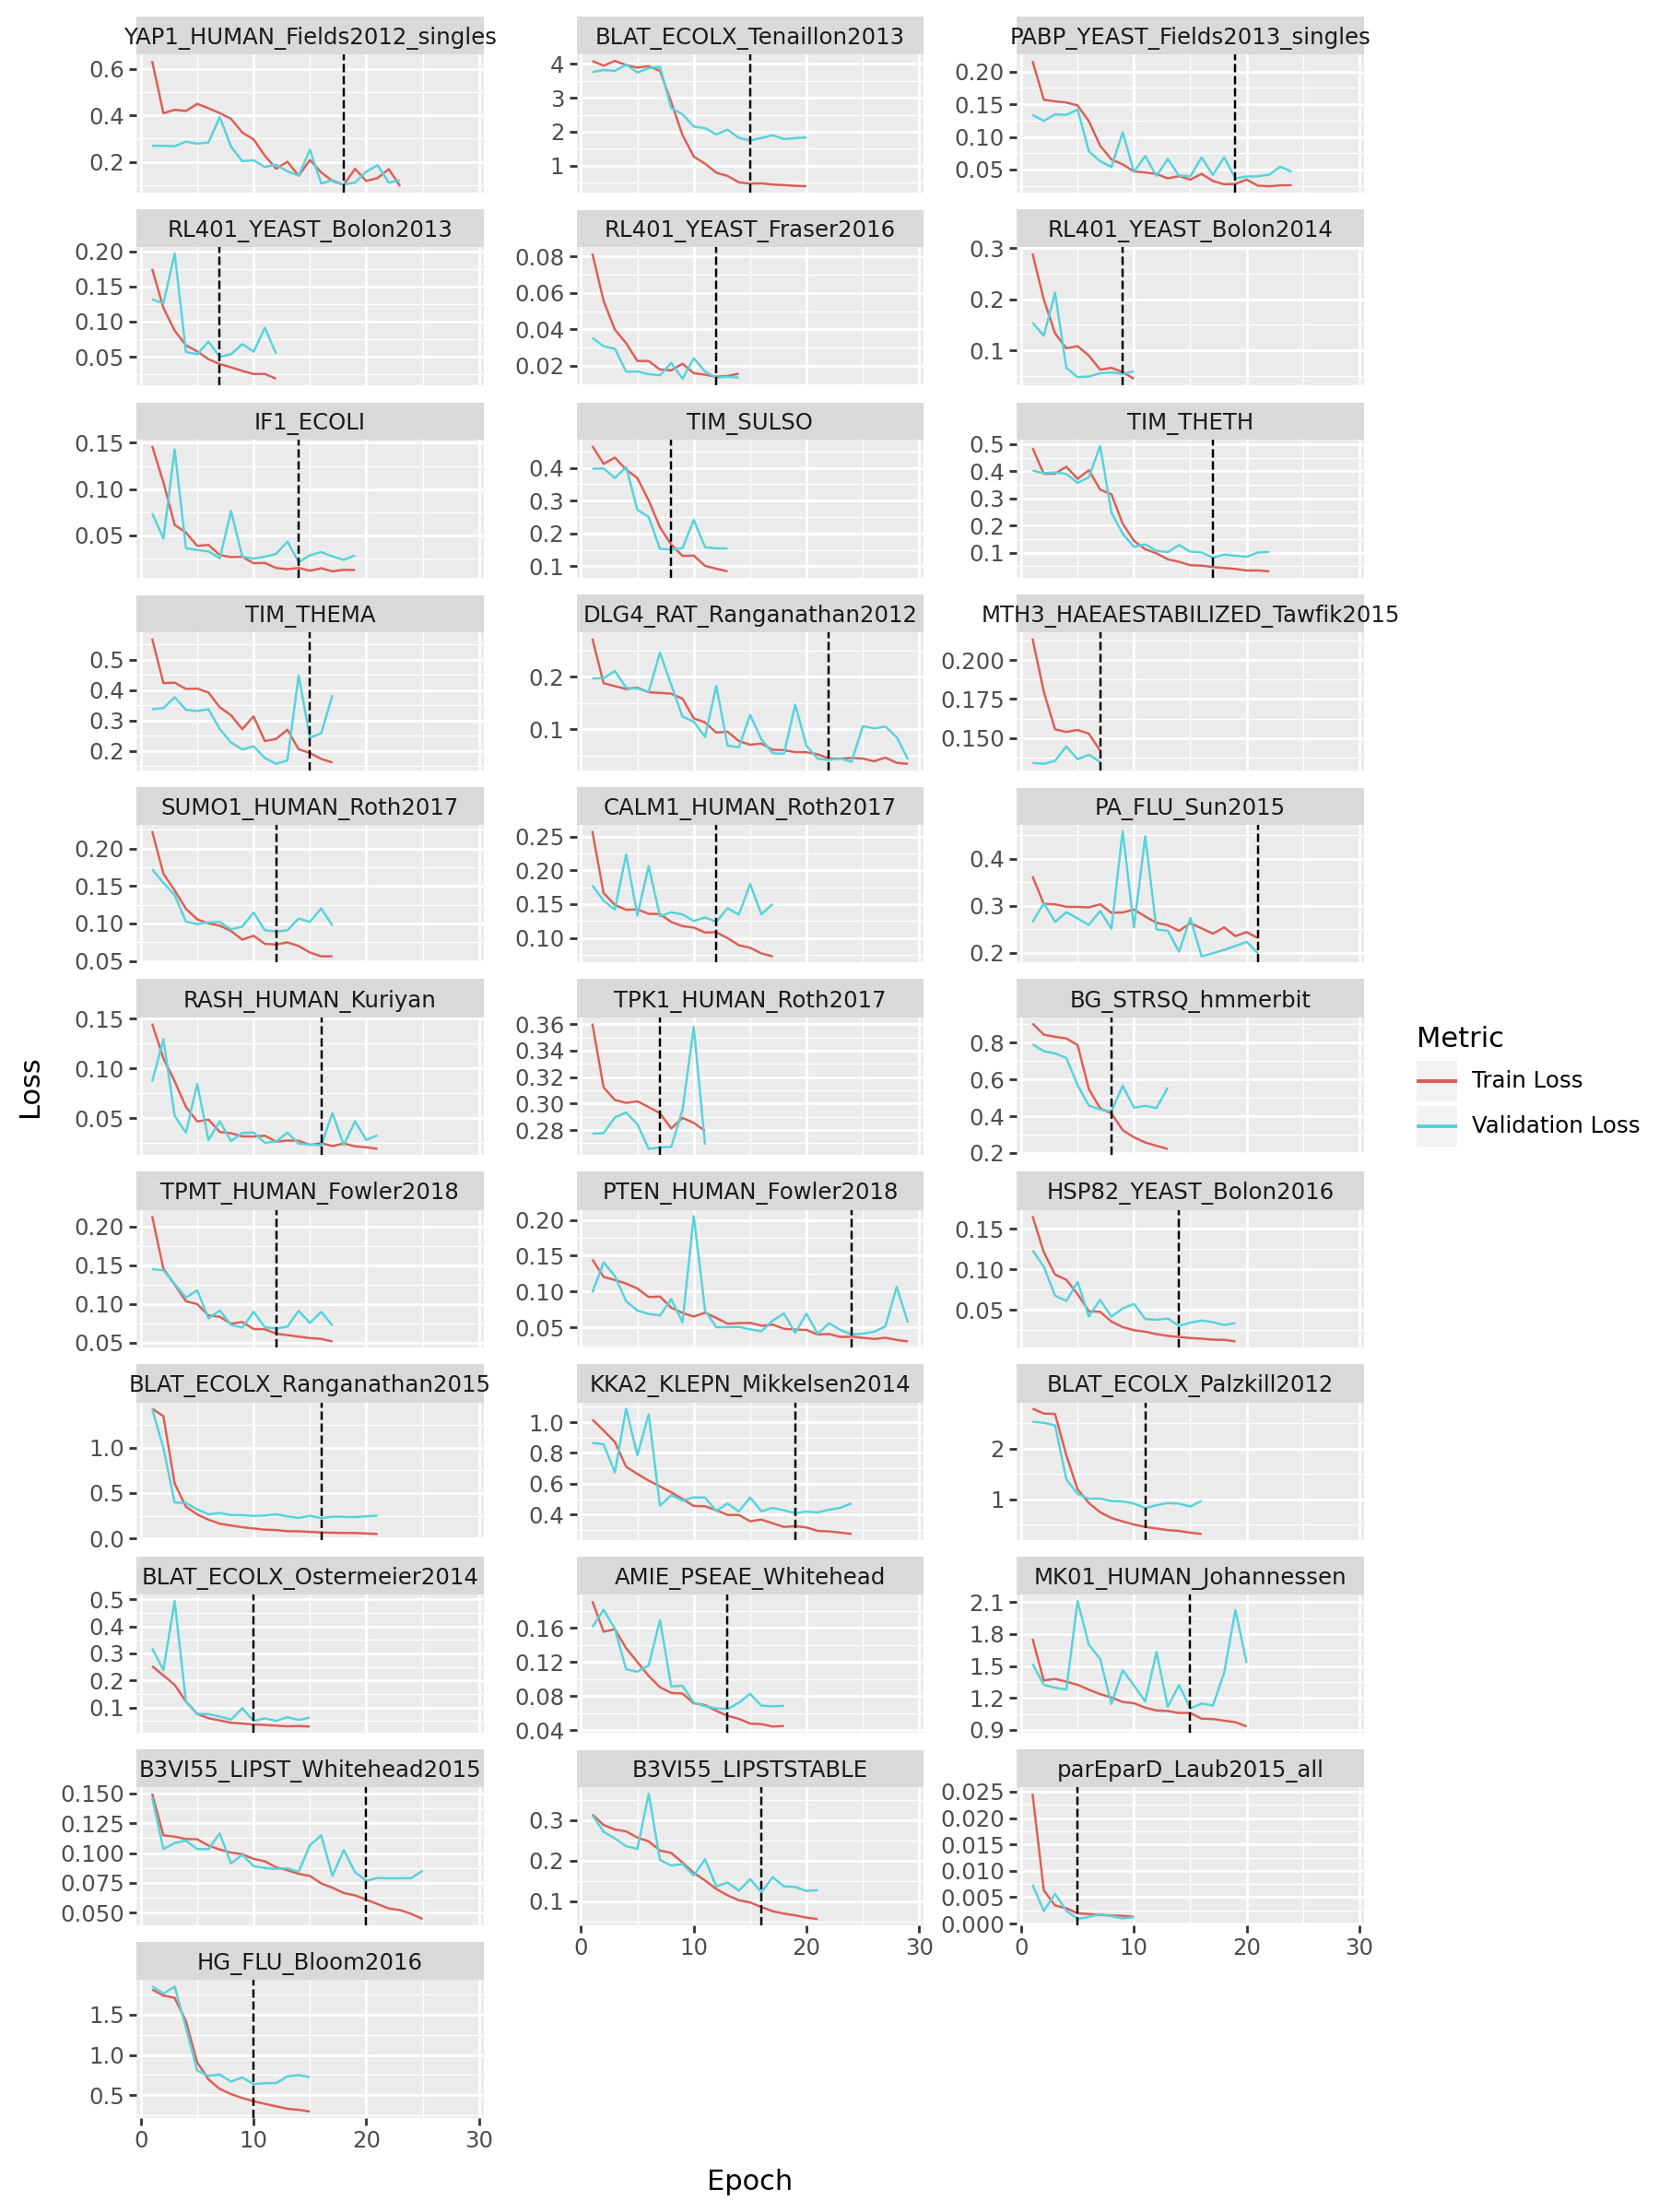

In [5]:
plot = (pln.ggplot(res)
        + pln.geom_line(pln.aes(x='Epoch', y='train_loss', color="'Train Loss'"))
        + pln.geom_line(pln.aes(x='Epoch', y='val_loss', color="'Validation Loss'"))
        + pln.geom_vline(pln.aes(xintercept='best_epoch'), color='black', linetype='dashed')
        + pln.xlab('Epoch')
        + pln.ylab('Loss')
        + pln.facet_wrap('Dataset', scales="free_y", ncol=3)
        + pln.labs(color="Metric")
        + pln.theme(figure_size=(9, 12)) 
        )
plot

/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


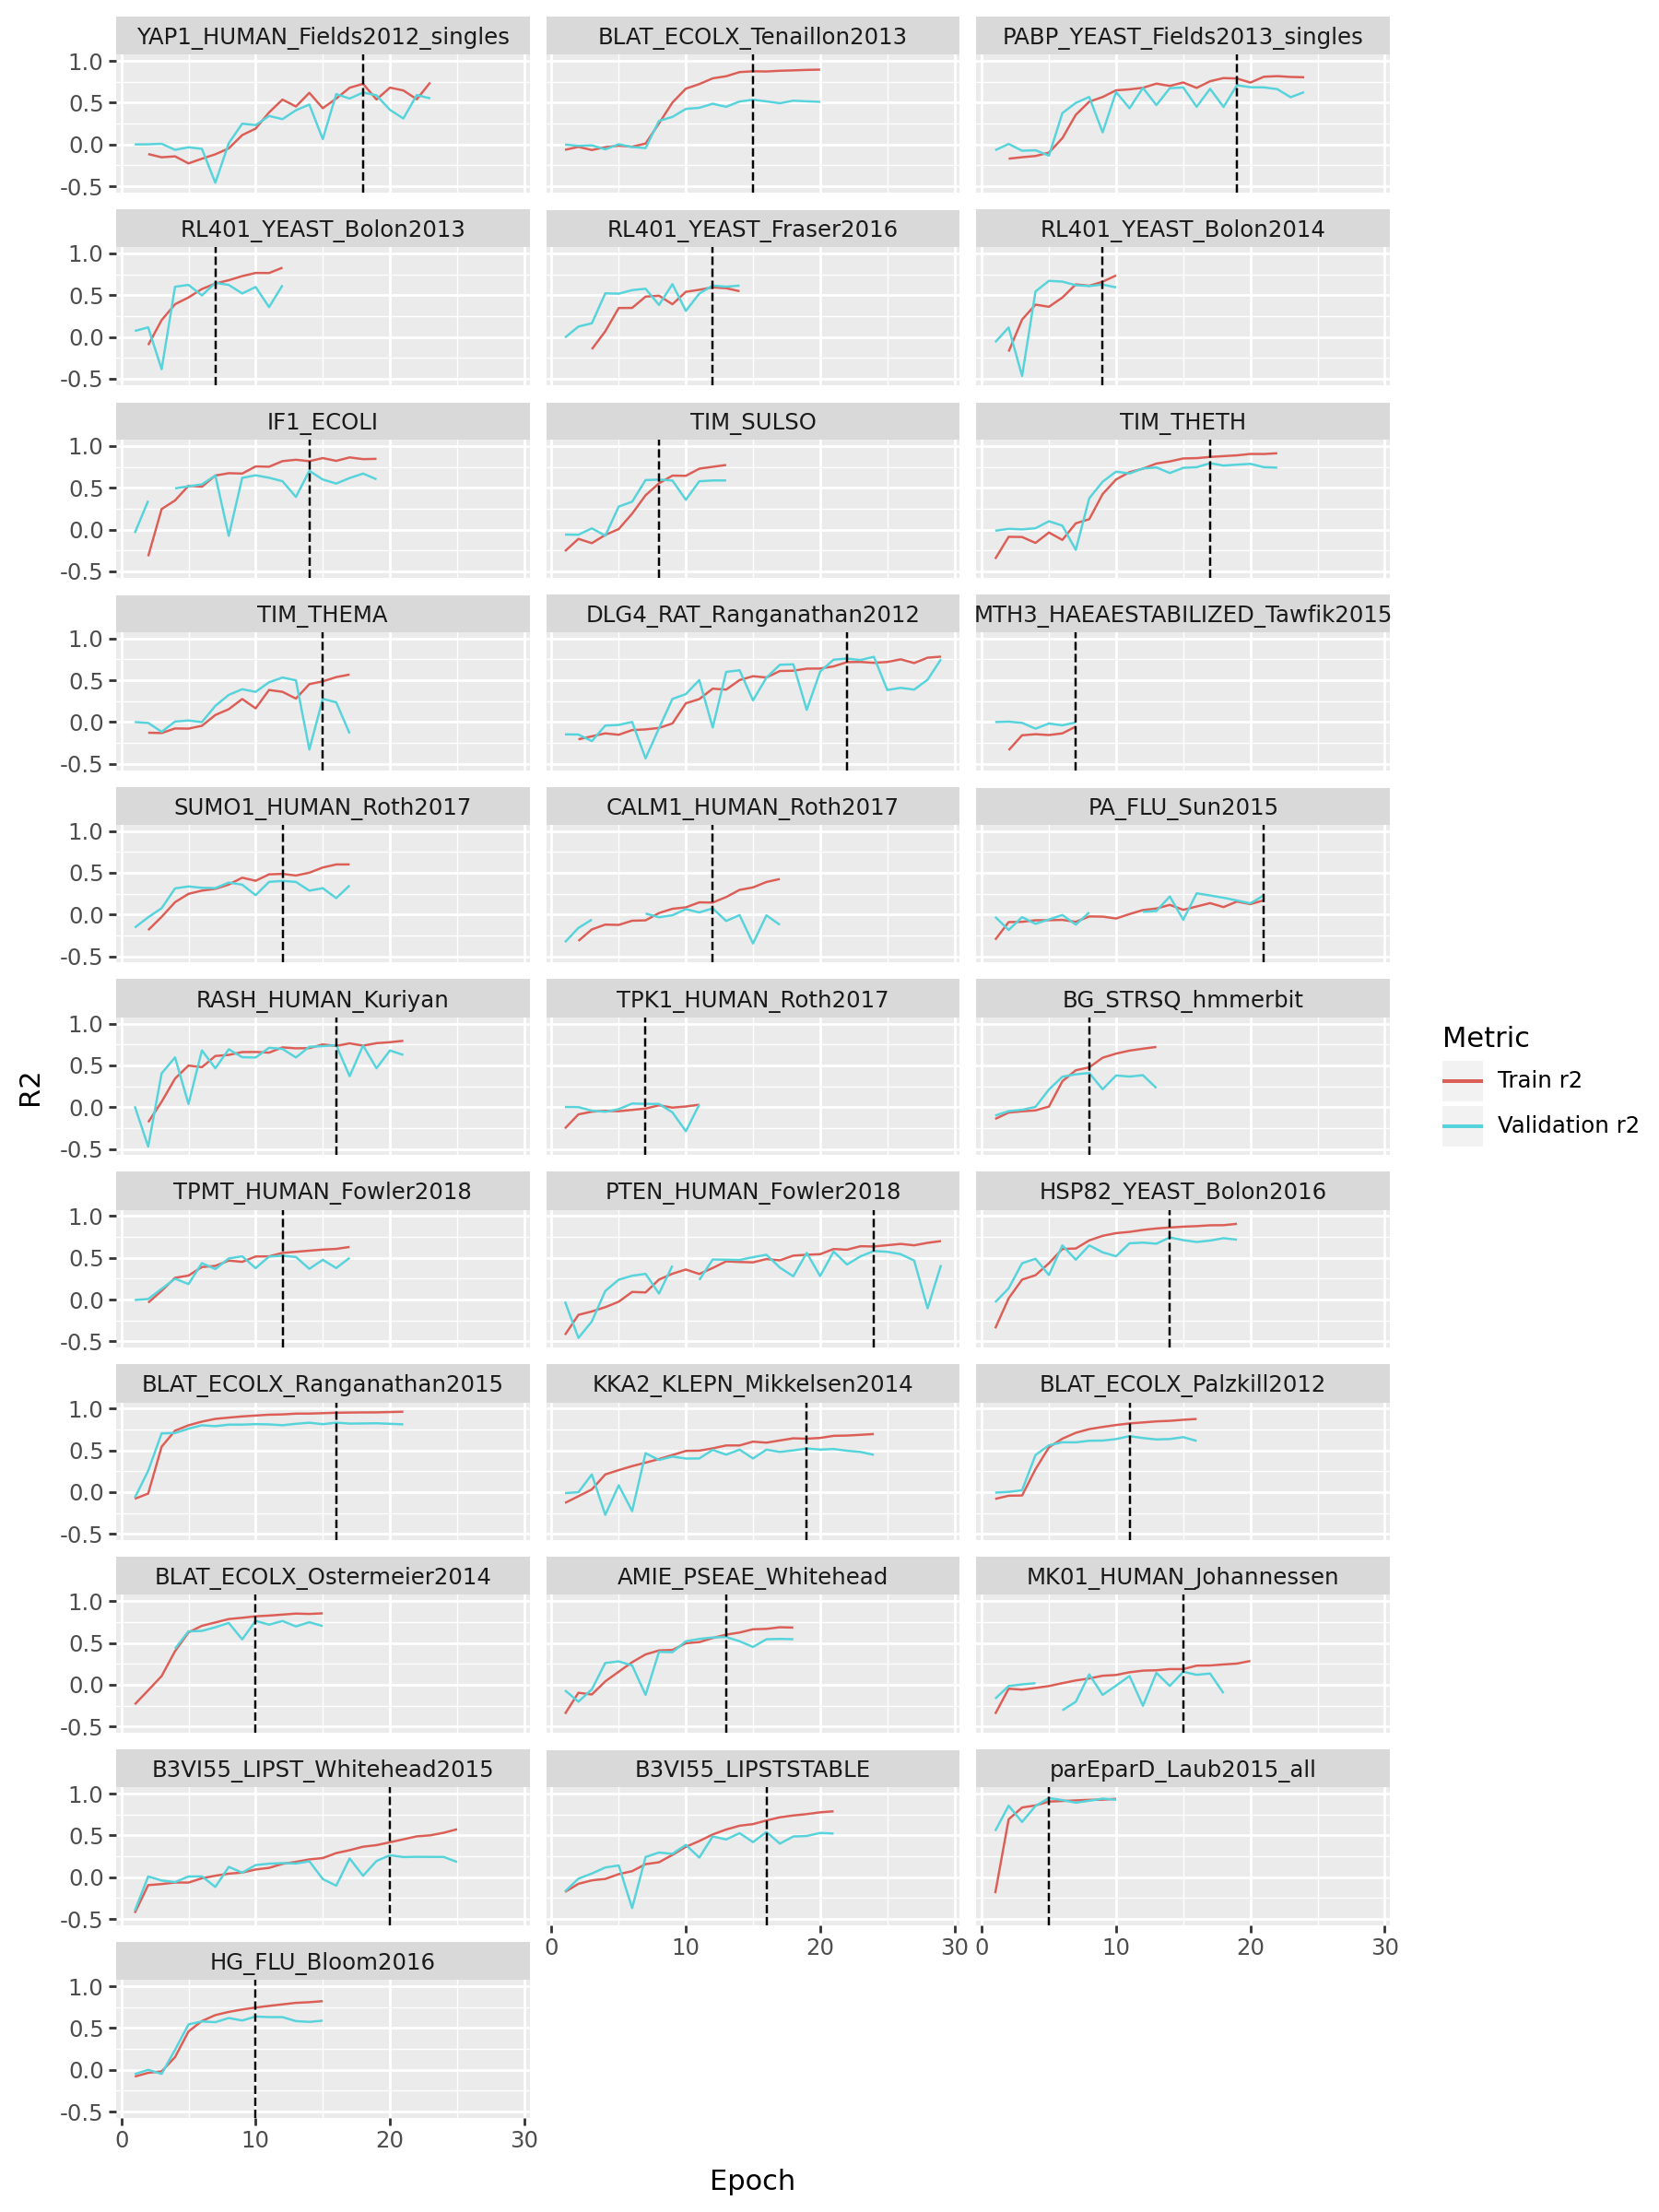

In [6]:
plot = (pln.ggplot(res)
        + pln.geom_line(pln.aes(x='Epoch', y='train_r2', color="'Train r2'"))
        + pln.geom_line(pln.aes(x='Epoch', y='val_r2', color="'Validation r2'"))
        + pln.geom_vline(pln.aes(xintercept='best_epoch'), color='black', linetype='dashed')
        + pln.xlab('Epoch')
        + pln.ylab('R2')
        + pln.facet_wrap('Dataset',  ncol=3)
        + pln.labs(color="Metric")
        + pln.ylim(-0.5, 1)
        + pln.theme(figure_size=(9, 12)) 
        )
plot

# Results from best epoch

In [7]:
old_names = ['HG_FLU_Bloom2016', 'BLAT_ECOLX_Ostermeier2014',
       'RL401_YEAST_Bolon2014', 'PABP_YEAST_Fields2013_doubles',
       'B3VI55_LIPST_Whitehead2015', 'TIM_THETH', 'CALM1_HUMAN_Roth2017',
       'parEparD_Laub2015_all', 'BF520_env_Bloom2018',
       'UBC9_HUMAN_Roth2017', 'DLG4_RAT_Ranganathan2012',
       'BRCA1_HUMAN_RING', 'TPMT_HUMAN_Fowler2018',
       'MTH3_HAEAESTABILIZED_Tawfik2015', 'HSP82_YEAST_Bolon2016',
       'MK01_HUMAN_Johannessen', 'PTEN_HUMAN_Fowler2018',
       'BG505_env_Bloom2018', 'BLAT_ECOLX_Tenaillon2013', 'TIM_SULSO',
       'B3VI55_LIPSTSTABLE', 'RL401_YEAST_Bolon2013',
       'PABP_YEAST_Fields2013_singles', 'BLAT_ECOLX_Ranganathan2015',
       'RL401_YEAST_Fraser2016', 'TIM_THEMA', 'AMIE_PSEAE_Whitehead',
       'BG_STRSQ_hmmerbit', 'GAL4_YEAST_Shendure2015',
       'BLAT_ECOLX_Palzkill2012', 'SUMO1_HUMAN_Roth2017',
       'RASH_HUMAN_Kuriyan', 'YAP1_HUMAN_Fields2012_singles',
       'KKA2_KLEPN_Mikkelsen2014', 'TPK1_HUMAN_Roth2017',
       'PA_FLU_Sun2015', 'IF1_ECOLI',
       'UBE4B_MOUSE_Klevit2013_singles', 'BRCA1_HUMAN_BRCT', 'POLG_HCVJF_Sun2014',
       'HIS7_YEAST_Kondrashov2017']

new_names = ['HG FLU', 'BLAT ECOLX 2014', 'RL401 2014',
       'PABP doubles', 'B3VI55 LIPST',
       'TIM THETH', 'CALM1 HUMAN', 'parEparD all',
       'BF520 env', 'UBC9 HUMAN', 'DLG4 RAT',
       'BRCA1 RING', 'TPMT HUMAN',
       'MTH3 HAEAESTABILIZED', 'HSP82 YEAST',
       'MK01 HUMAN', 'PTEN HUMAN',
       'BG505 env', 'BLAT ECOLX 2013', 'TIM SULSO',
       'B3VI55 LIPSTSTABLE', 'RL401 2013',
       'PABP singles', 'BLAT ECOLX 2015',
       'RL401 2016', 'TIM THEMA', 'AMIE PSEAE',
       'BG STRSQ', 'GAL4 YEAST',
       'BLAT ECOLX 2012', 'SUMO1 HUMAN',
       'RASH HUMAN', 'YAP1 singles',
       'KKA2 KLEPN', 'TPK1 HUMAN',
       'PA FLU', 'IF1 ECOLI',
       'UBE4B singles', 'BRCA1 BRCT', 'POLG Sun2014',
       'HIS7_YEAST']

name_map = dict(zip(old_names, new_names))

In [8]:
def read_CSVLogger(dir_path):
    df = pd.read_csv(f"{dir_path}/metrics.csv")
    train_df = df[df["train_loss"].notna()].copy().drop(columns=["val_loss", "val_r2"])
    val_df = df[df["val_loss"].notna()].copy().drop(columns=["train_loss", "train_r2"])
    res = pd.merge(train_df, val_df, on=["epoch", "step"])
    res.rename(columns={"epoch": "Epoch"}, inplace=True)
    res['Epoch'] = res['Epoch'].astype(int) + 1
  
    # find the intersection epoch
    best_epoch = res[res['train_loss'] >= (res['val_loss'] - 0.06)]['val_r2'].idxmax()
    res = res.iloc[[best_epoch], :]
    return res

# test
dir_path = '../results/fineTune/DMS/LitEsm2neLora/esm2_8M/BLAT_ECOLX_Ostermeier2014/'
res = read_CSVLogger(dir_path)
res.head()

,Epoch,step,train_loss,train_r2,val_loss,val_r2
35,36,19691,0.10049,0.509672,0.093909,0.558551


In [9]:
res_full = pd.DataFrame()
models = ['esm2_8M','esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B']
for model in models:
    res = pd.DataFrame()
    res_dir = f'../results/fineTune/DMS/LitEsm2neLora/{model}/'
    for dataset in os.listdir(res_dir):
        df =read_CSVLogger(f'{res_dir}/{dataset}/')
        df['Model'] = model
        df['Dataset'] = dataset
        res_full = pd.concat([res_full, df], ignore_index=True)
    

res_full['Dataset'] = res_full['Dataset'].replace(name_map)
res_full.rename(columns={'Dataset': 'Dataset_Name', 'model':'ModelSize'}, inplace=True)
res_full['ModelSize'] = [x.replace('esm2_', '') for x in res_full['Model']]
res_full

,Epoch,step,train_loss,train_r2,val_loss,val_r2,Model,Dataset_Name,ModelSize
0,22,3959,0.074782,0.467151,0.097557,0.346600,esm2_8M,SUMO1 HUMAN,8M
1,15,5969,0.090920,0.350861,0.085040,0.411470,esm2_8M,TPMT HUMAN,8M
2,8,5255,0.124337,0.124884,0.120511,0.201393,esm2_8M,AMIE PSEAE,8M
3,18,12257,1.179123,0.094314,1.200918,0.077416,esm2_8M,MK01 HUMAN,8M
4,28,8763,0.033164,0.644013,0.032883,0.625324,esm2_8M,RASH HUMAN,8M
...,...,...,...,...,...,...,...,...,...
150,11,395,0.216521,0.410505,0.128816,0.521307,esm2_3B,YAP1 singles,3B
151,9,7262,0.059458,0.433263,0.074366,0.287240,esm2_3B,B3VI55 LIPST,3B
152,4,2103,1.039412,0.597072,0.984385,0.608654,esm2_3B,BLAT ECOLX 2012,3B
153,5,1749,0.370329,0.532626,0.401463,0.441757,esm2_3B,BG STRSQ,3B


In [10]:
# just checking if I have the same number of datasets per model
res_full.groupby(['Model']).size()

Model
esm2_150M    31
esm2_35M     31
esm2_3B      31
esm2_650M    31
esm2_8M      31
dtype: int64

In [11]:
#res_full.to_csv('../results/fineTune/DMS/LitESM2ne_res_DMS_all.csv', index=False)
#res_full = pd.read_csv('../results/fineTune/DMS/LitESM2ne_res_DMS_all.csv')
m_order = ['8M','35M', '150M', '650M', '3B']
res_full['ModelSize'] = pd.Categorical(res_full['ModelSize'], categories=m_order, ordered=True)
res_full

,Epoch,step,train_loss,train_r2,val_loss,val_r2,Model,Dataset_Name,ModelSize
0,22,3959,0.074782,0.467151,0.097557,0.346600,esm2_8M,SUMO1 HUMAN,8M
1,15,5969,0.090920,0.350861,0.085040,0.411470,esm2_8M,TPMT HUMAN,8M
2,8,5255,0.124337,0.124884,0.120511,0.201393,esm2_8M,AMIE PSEAE,8M
3,18,12257,1.179123,0.094314,1.200918,0.077416,esm2_8M,MK01 HUMAN,8M
4,28,8763,0.033164,0.644013,0.032883,0.625324,esm2_8M,RASH HUMAN,8M
...,...,...,...,...,...,...,...,...,...
150,11,395,0.216521,0.410505,0.128816,0.521307,esm2_3B,YAP1 singles,3B
151,9,7262,0.059458,0.433263,0.074366,0.287240,esm2_3B,B3VI55 LIPST,3B
152,4,2103,1.039412,0.597072,0.984385,0.608654,esm2_3B,BLAT ECOLX 2012,3B
153,5,1749,0.370329,0.532626,0.401463,0.441757,esm2_3B,BG STRSQ,3B


In [12]:
gres = res_full.groupby(['Dataset_Name'])['val_r2'].mean().sort_values(ascending=True)
r2_order = gres.index
res_full['Dataset_Name'] = pd.Categorical(res_full['Dataset_Name'], categories=r2_order, ordered=True)
res_full

,Epoch,step,train_loss,train_r2,val_loss,val_r2,Model,Dataset_Name,ModelSize
0,22,3959,0.074782,0.467151,0.097557,0.346600,esm2_8M,SUMO1 HUMAN,8M
1,15,5969,0.090920,0.350861,0.085040,0.411470,esm2_8M,TPMT HUMAN,8M
2,8,5255,0.124337,0.124884,0.120511,0.201393,esm2_8M,AMIE PSEAE,8M
3,18,12257,1.179123,0.094314,1.200918,0.077416,esm2_8M,MK01 HUMAN,8M
4,28,8763,0.033164,0.644013,0.032883,0.625324,esm2_8M,RASH HUMAN,8M
...,...,...,...,...,...,...,...,...,...
150,11,395,0.216521,0.410505,0.128816,0.521307,esm2_3B,YAP1 singles,3B
151,9,7262,0.059458,0.433263,0.074366,0.287240,esm2_3B,B3VI55 LIPST,3B
152,4,2103,1.039412,0.597072,0.984385,0.608654,esm2_3B,BLAT ECOLX 2012,3B
153,5,1749,0.370329,0.532626,0.401463,0.441757,esm2_3B,BG STRSQ,3B


/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../results/fineTune/DMS/lora_boxplot_r4_a32.png


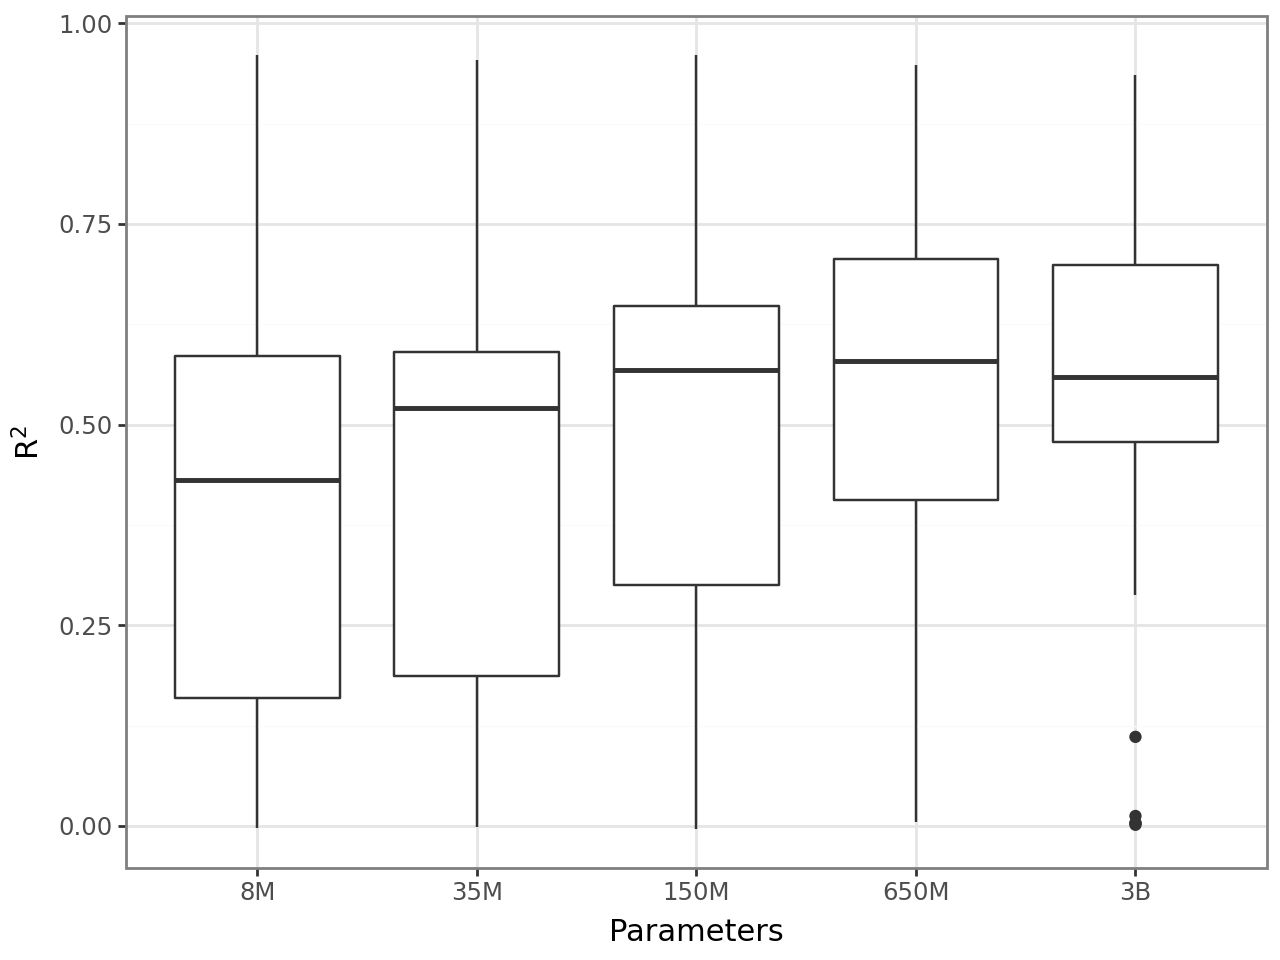

In [ ]:
plot = (pln.ggplot(res_full)
        + pln.geom_boxplot(pln.aes(x='ModelSize', y='val_r2'))
        + pln.xlab('Parameters')
        + pln.ylab('R$^2$')
        + pln.theme(figure_size=(6, 4)) 
        +pln.theme_bw()
        )
plot.save('../results/fineTune/DMS/sup5_fine-tune.png', dpi=600)
plot

/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 10 x 11 in image.
/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../results/fineTune/DMS/sup5_fine-tune.png


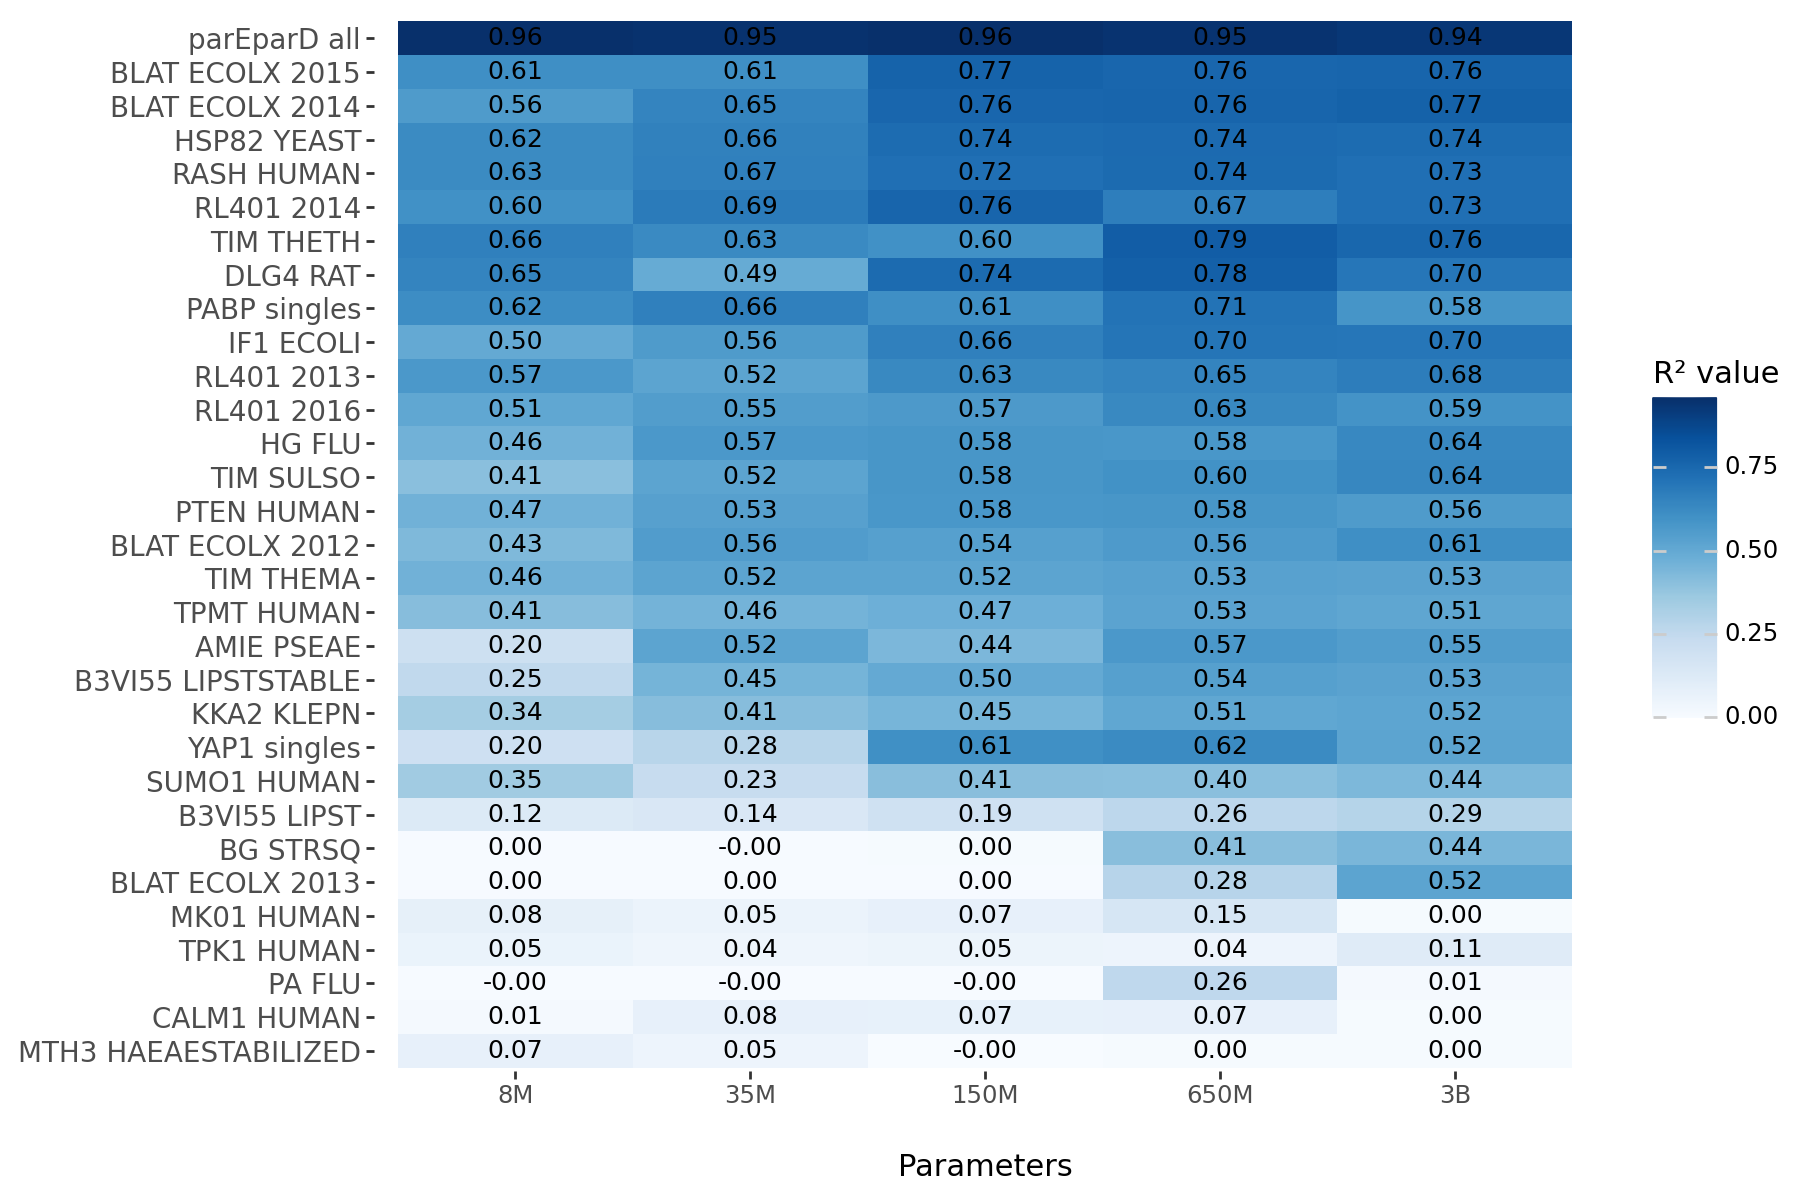

In [14]:
plot = (
    pln.ggplot(res_full, pln.aes(x='ModelSize', y='Dataset_Name', fill='val_r2'))
    + pln.geom_tile()
    + pln.geom_text(pln.aes(label='val_r2'), color='black', size=9, format_string="{:.2f}")
    + pln.xlab('\nParameters')
    + pln.ylab('')
    + pln.scale_fill_cmap(cmap_name='Blues') 
    + pln.theme(figure_size=(9, 6))
    + pln.theme(panel_background=pln.element_blank(), axis_text_y=pln.element_text(size=10))
    + pln.guides(fill=pln.guide_colorbar(title="R² value", ))
    )
  
plot.save('../results/fineTune/DMS/sup5_fine-tune.png', height=11, width=10, dpi=600)
plot

In [15]:
res_FT = res_full[['ModelSize', 'Dataset_Name','val_r2']]
res_FT

,ModelSize,Dataset_Name,val_r2
0,8M,SUMO1 HUMAN,0.346600
1,8M,TPMT HUMAN,0.411470
2,8M,AMIE PSEAE,0.201393
3,8M,MK01 HUMAN,0.077416
4,8M,RASH HUMAN,0.625324
...,...,...,...
150,3B,YAP1 singles,0.521307
151,3B,B3VI55 LIPST,0.287240
152,3B,BLAT ECOLX 2012,0.608654
153,3B,BG STRSQ,0.441757


## Lasso results

In [16]:
models = ['8M','35M', '150M', '650M', '3B']
l_dms = list(res_FT['Dataset_Name'].values)

res_lasso = pd.read_csv('../results/lassoCV/DMS/summary_DMS_all_multi_model.csv', index_col=0)
res_lasso = res_lasso.query("Model == 'esm2' & ModelSize in @models & Dataset_Name in @l_dms")
res_lasso['ModelSize'] = pd.Categorical(res_lasso['ModelSize'], categories=models, ordered=True)
res_lasso

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_method,Dataset,Dataset_Name,ModelSize,parameters
175,esm2,1,0.120851,1.031342,1.212815,0.108355,1.066497,1.252073,0.369393,0.339726,40,mean,HG_FLU_Bloom2016,HG FLU,8M,8.000000e+06
176,esm2,2,0.133934,1.024649,1.208528,0.102220,1.054074,1.237900,0.381867,0.338155,42,mean,HG_FLU_Bloom2016,HG FLU,8M,8.000000e+06
177,esm2,3,0.125485,1.036085,1.217964,0.134839,1.019503,1.201070,0.373270,0.392435,43,mean,HG_FLU_Bloom2016,HG FLU,8M,8.000000e+06
178,esm2,4,0.105634,1.054838,1.235293,0.104241,1.033803,1.207525,0.350656,0.345645,27,mean,HG_FLU_Bloom2016,HG FLU,8M,8.000000e+06
179,esm2,5,0.133035,1.028930,1.210688,0.125806,1.027430,1.215219,0.383545,0.363291,46,mean,HG_FLU_Bloom2016,HG FLU,8M,8.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,esm2,1,0.414432,0.176443,0.233647,0.374363,0.183592,0.234239,0.697713,0.655254,86,mean,RASH_HUMAN_Kuriyan,RASH HUMAN,3B,3.000000e+09
1171,esm2,2,0.462158,0.165786,0.222842,0.436238,0.177344,0.226958,0.722631,0.698037,116,mean,RASH_HUMAN_Kuriyan,RASH HUMAN,3B,3.000000e+09
1172,esm2,3,0.461306,0.168674,0.219685,0.362721,0.177834,0.255386,0.721269,0.688880,98,mean,RASH_HUMAN_Kuriyan,RASH HUMAN,3B,3.000000e+09
1173,esm2,4,0.394184,0.179809,0.237973,0.385151,0.182525,0.230966,0.691863,0.648185,77,mean,RASH_HUMAN_Kuriyan,RASH HUMAN,3B,3.000000e+09


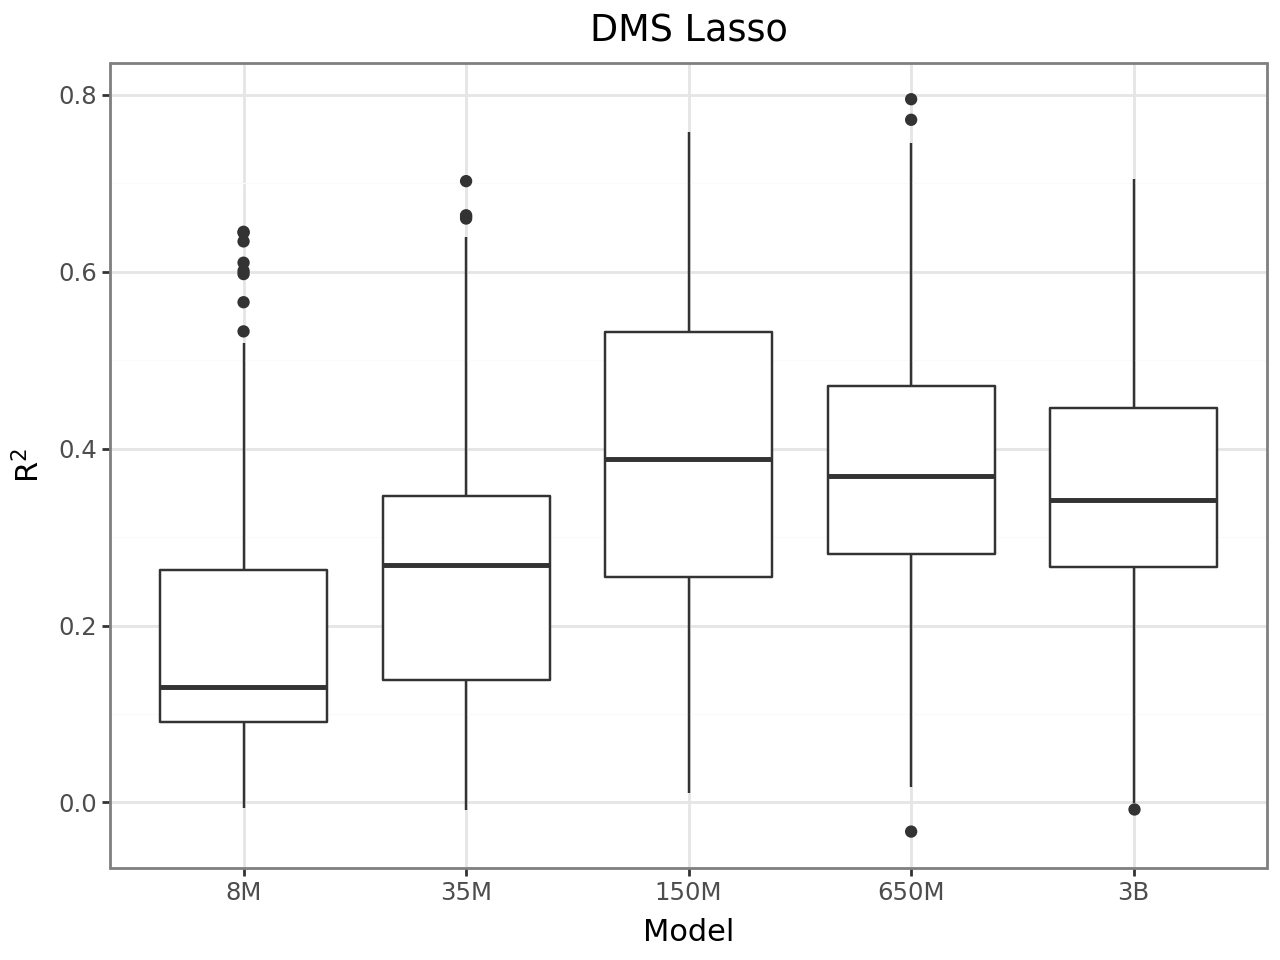

In [17]:
plot = (pln.ggplot(res_lasso)
        + pln.geom_boxplot(pln.aes(x='ModelSize', y='R2_score_test'))
        + pln.ggtitle(f'DMS Lasso')
        + pln.xlab('Model')
        + pln.ylab('R$^2$')
        + pln.theme(figure_size=(6, 4)) 
        + pln.theme_bw()
        )
plot

In [18]:
# group the cross validations in r2
cs = ['ModelSize', 'Dataset_Name']
res_lasso = res_lasso.groupby(cs, as_index=False)['R2_score_test'].mean()
res_lasso

/tmp/ipykernel_3722740/3670151943.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,ModelSize,Dataset_Name,R2_score_test
0,8M,AMIE PSEAE,0.130779
1,8M,B3VI55 LIPST,0.024452
2,8M,B3VI55 LIPSTSTABLE,0.080107
3,8M,BG STRSQ,0.132526
4,8M,BLAT ECOLX 2012,0.042994
...,...,...,...
150,3B,TIM THETH,0.452595
151,3B,TPK1 HUMAN,0.105895
152,3B,TPMT HUMAN,0.410184
153,3B,YAP1 singles,0.429853


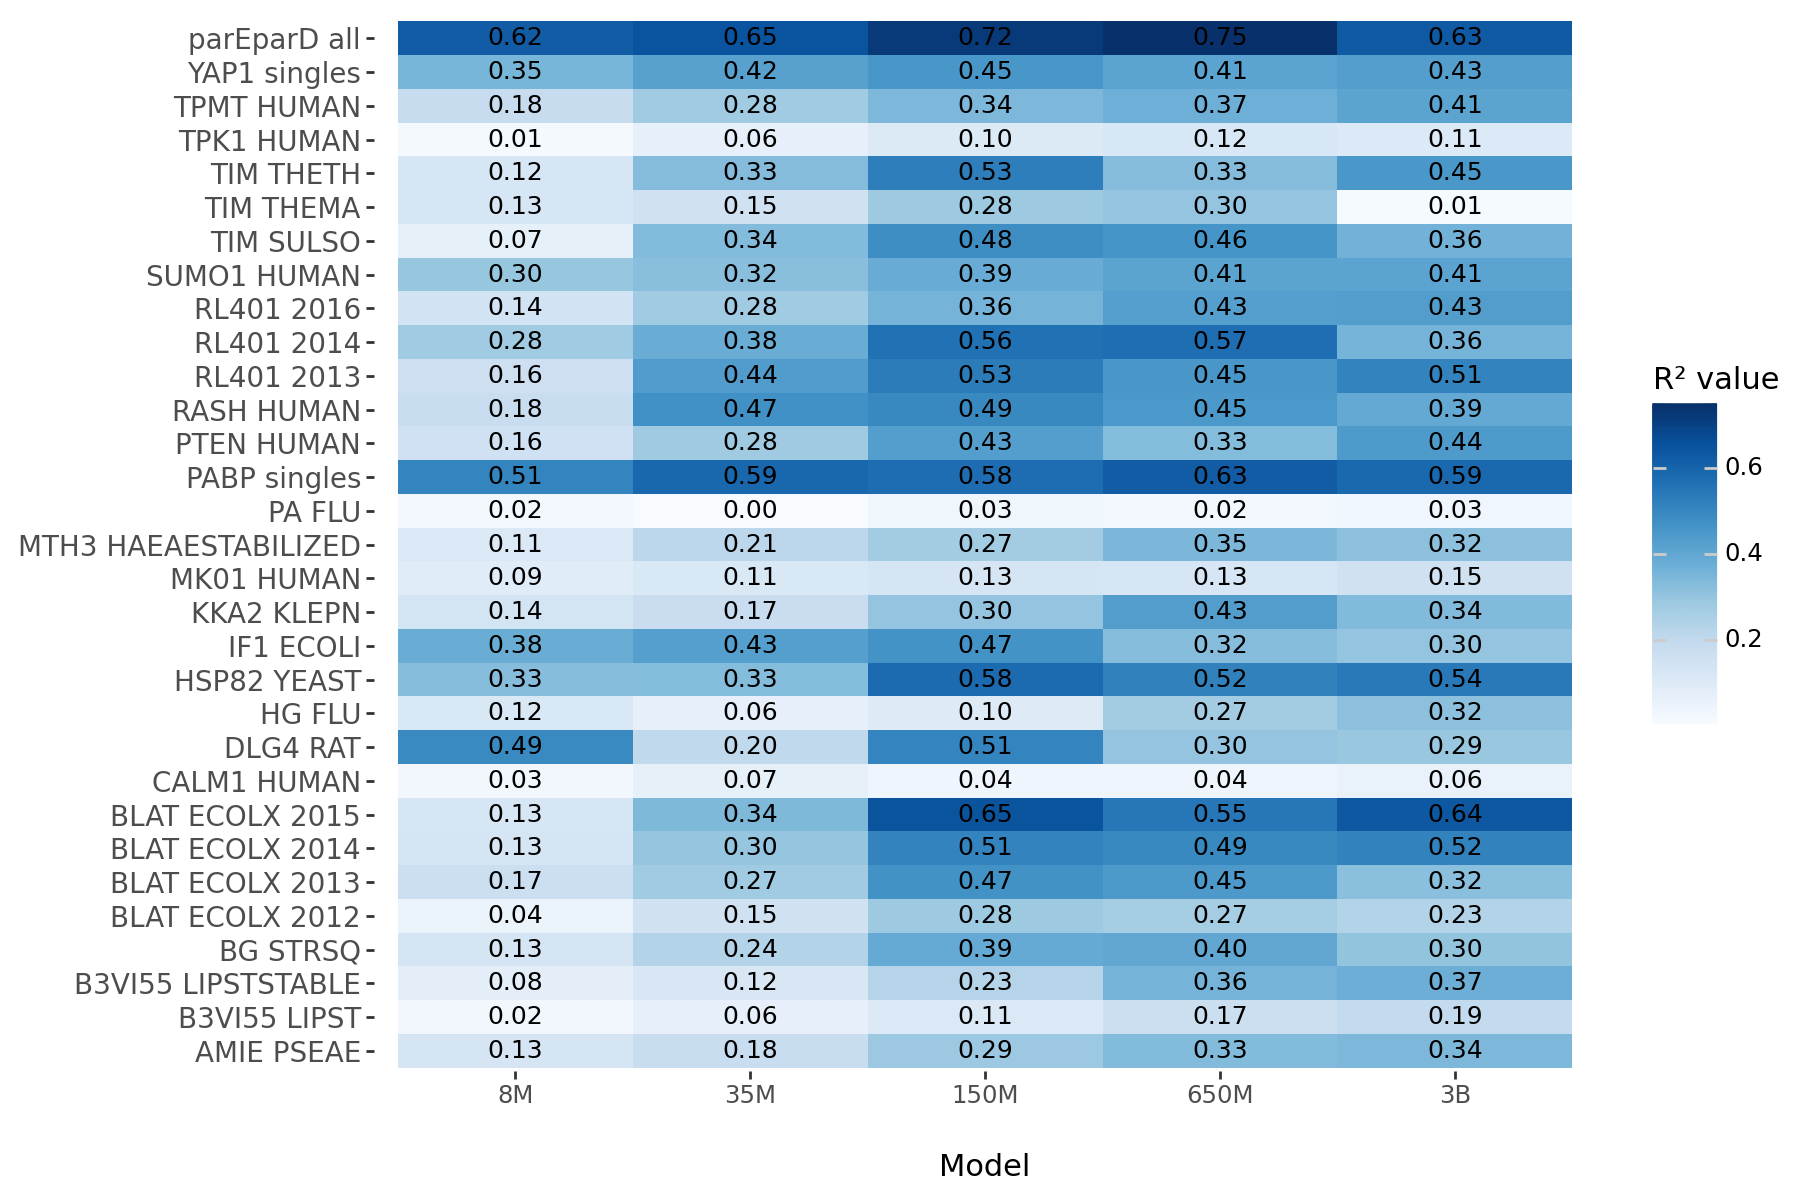

In [19]:
plot = (
    pln.ggplot(res_lasso, pln.aes(x='ModelSize', y='Dataset_Name', fill='R2_score_test'))
    + pln.geom_tile()
    + pln.geom_text(pln.aes(label='R2_score_test'), color='black', size=9, format_string="{:.2f}")
    + pln.xlab('\nModel')
    + pln.ylab('')
    + pln.scale_fill_cmap(cmap_name='Blues') 
    + pln.theme(figure_size=(9, 6))
    + pln.theme(panel_background=pln.element_blank(), axis_text_y=pln.element_text(size=10))
    + pln.guides(fill=pln.guide_colorbar(title="R² value", ))
    )
  
plot

# Comparing transferlearning strategies

In [20]:
res_FT = pd.read_csv('../results/fineTune/DMS/LitESM2ne_res_DMS_all.csv', usecols=['ModelSize', 'Dataset_Name', 'val_r2'])
res_FT['ModelSize'] = pd.Categorical(res_FT['ModelSize'], categories=models, ordered=True)

In [21]:
cols = ['ModelSize', 'Dataset_Name']
res = res_lasso.merge(res_FT, on=cols, how='inner')
res['R2'] = res['val_r2'] - res['R2_score_test']
res['R2_ratio'] = res['val_r2'] / res['R2_score_test'] 
res['R2_ratio'] = res['R2_ratio'].round(2)

res.describe()

,R2_score_test,val_r2,R2,R2_ratio
count,155.000000,155.000000,155.000000,155.000000
mean,0.308582,0.464164,0.155582,2.195806
std,0.178338,0.259989,0.189289,5.044222
min,0.002354,-0.004542,-0.467682,-0.470000
25%,0.146143,0.271273,0.038036,1.155000
50%,0.318265,0.528800,0.179209,1.480000
75%,0.435290,0.637117,0.294130,2.010000
max,0.751287,0.960204,0.540519,60.950000


In [22]:
bins_size = pd.read_csv('../data/DMS_sequences_lengths_bins.csv')
bins_size['Dataset_Name'] = bins_size['Dataset'].replace(name_map)
res = res.merge(bins_size, on='Dataset_Name', how='left')
res

,ModelSize,Dataset_Name,R2_score_test,val_r2,R2,R2_ratio,Dataset,length,binned_length
0,8M,AMIE PSEAE,0.130779,0.201393,0.070614,1.54,AMIE_PSEAE_Whitehead,6568,3200-10000
1,8M,B3VI55 LIPST,0.024452,0.122667,0.098215,5.02,B3VI55_LIPST_Whitehead2015,8067,3200-10000
2,8M,B3VI55 LIPSTSTABLE,0.080107,0.253328,0.173221,3.16,B3VI55_LIPSTSTABLE,8329,3200-10000
3,8M,BG STRSQ,0.132526,0.001020,-0.131505,0.01,BG_STRSQ_hmmerbit,3500,3200-10000
4,8M,BLAT ECOLX 2012,0.042994,0.431226,0.388232,10.03,BLAT_ECOLX_Palzkill2012,5259,3200-10000
...,...,...,...,...,...,...,...,...,...
150,3B,TIM THETH,0.452595,0.757250,0.304654,1.67,TIM_THETH,1519,1000-3200
151,3B,TPK1 HUMAN,0.105895,0.110860,0.004965,1.05,TPK1_HUMAN_Roth2017,3424,3200-10000
152,3B,TPMT HUMAN,0.410184,0.513787,0.103604,1.25,TPMT_HUMAN_Fowler2018,3984,3200-10000
153,3B,YAP1 singles,0.429853,0.521307,0.091455,1.21,YAP1_HUMAN_Fields2012_singles,362,<1000


/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6 x 6 in image.
/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../results/sup5_fineTune_vs_featureX.png
/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.
/stor/work/Wilke/luiz/SWAT/venv3.10/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


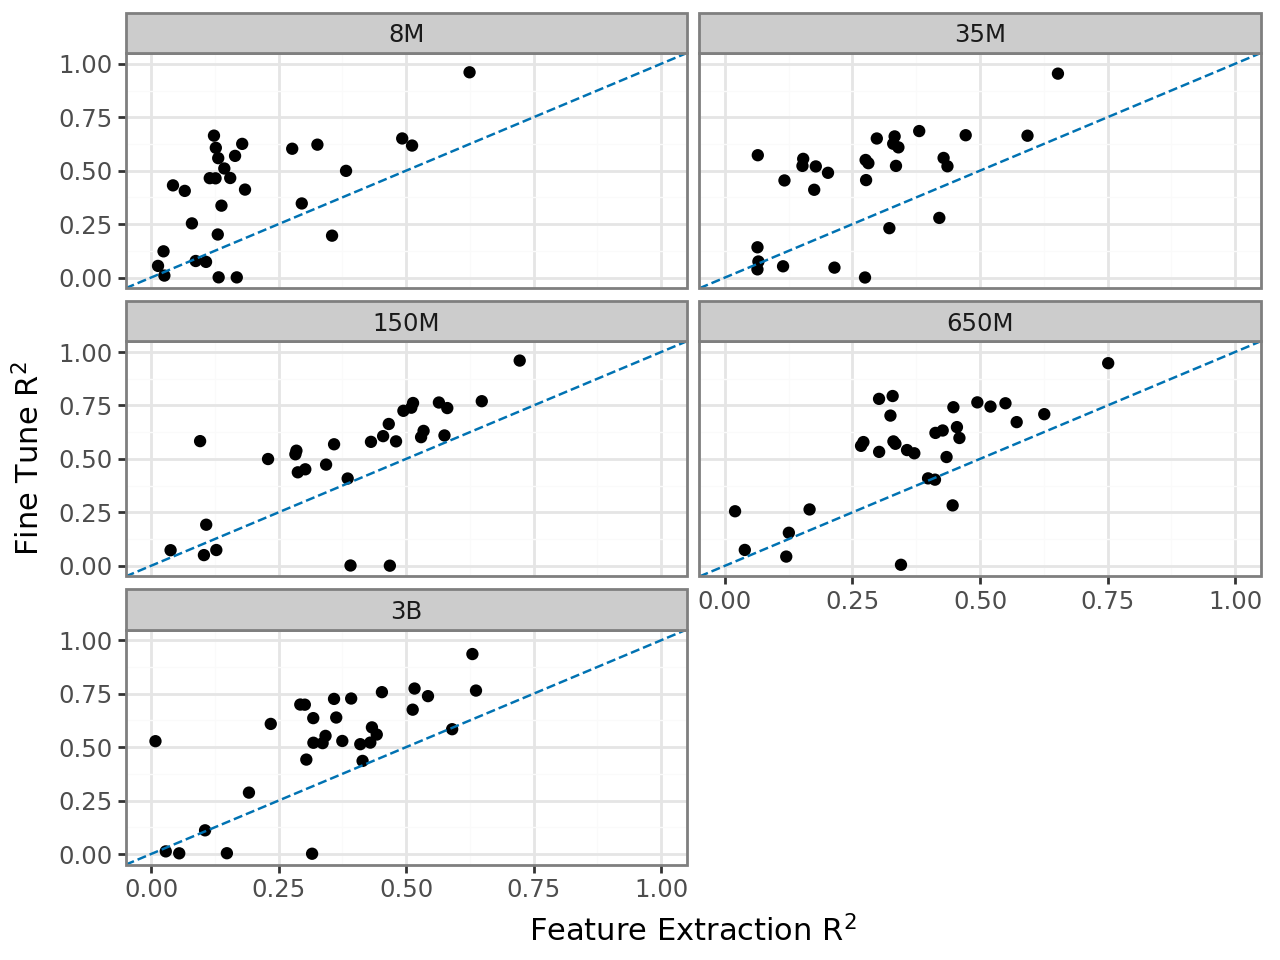

In [23]:
plot = (pln.ggplot(res)
        + pln.geom_point(pln.aes(y='val_r2', x='R2_score_test'))
        + pln.geom_abline(slope=1, intercept=0, color="#0072B2", linetype='dashed')
        + pln.ylab('Fine Tune R$^2$')
        + pln.xlab('Feature Extraction R$^2$')
        + pln.facet_wrap('ModelSize', ncol=2)
        + pln.ylim(0, 1)
        + pln.xlim(0, 1)
        + pln.theme(figure_size=(6, 6)) 
        + pln.theme_bw()
        )

plot.save('../results/sup5_fineTune_vs_featureX.png', dpi=600, width=6, height=6)
plot

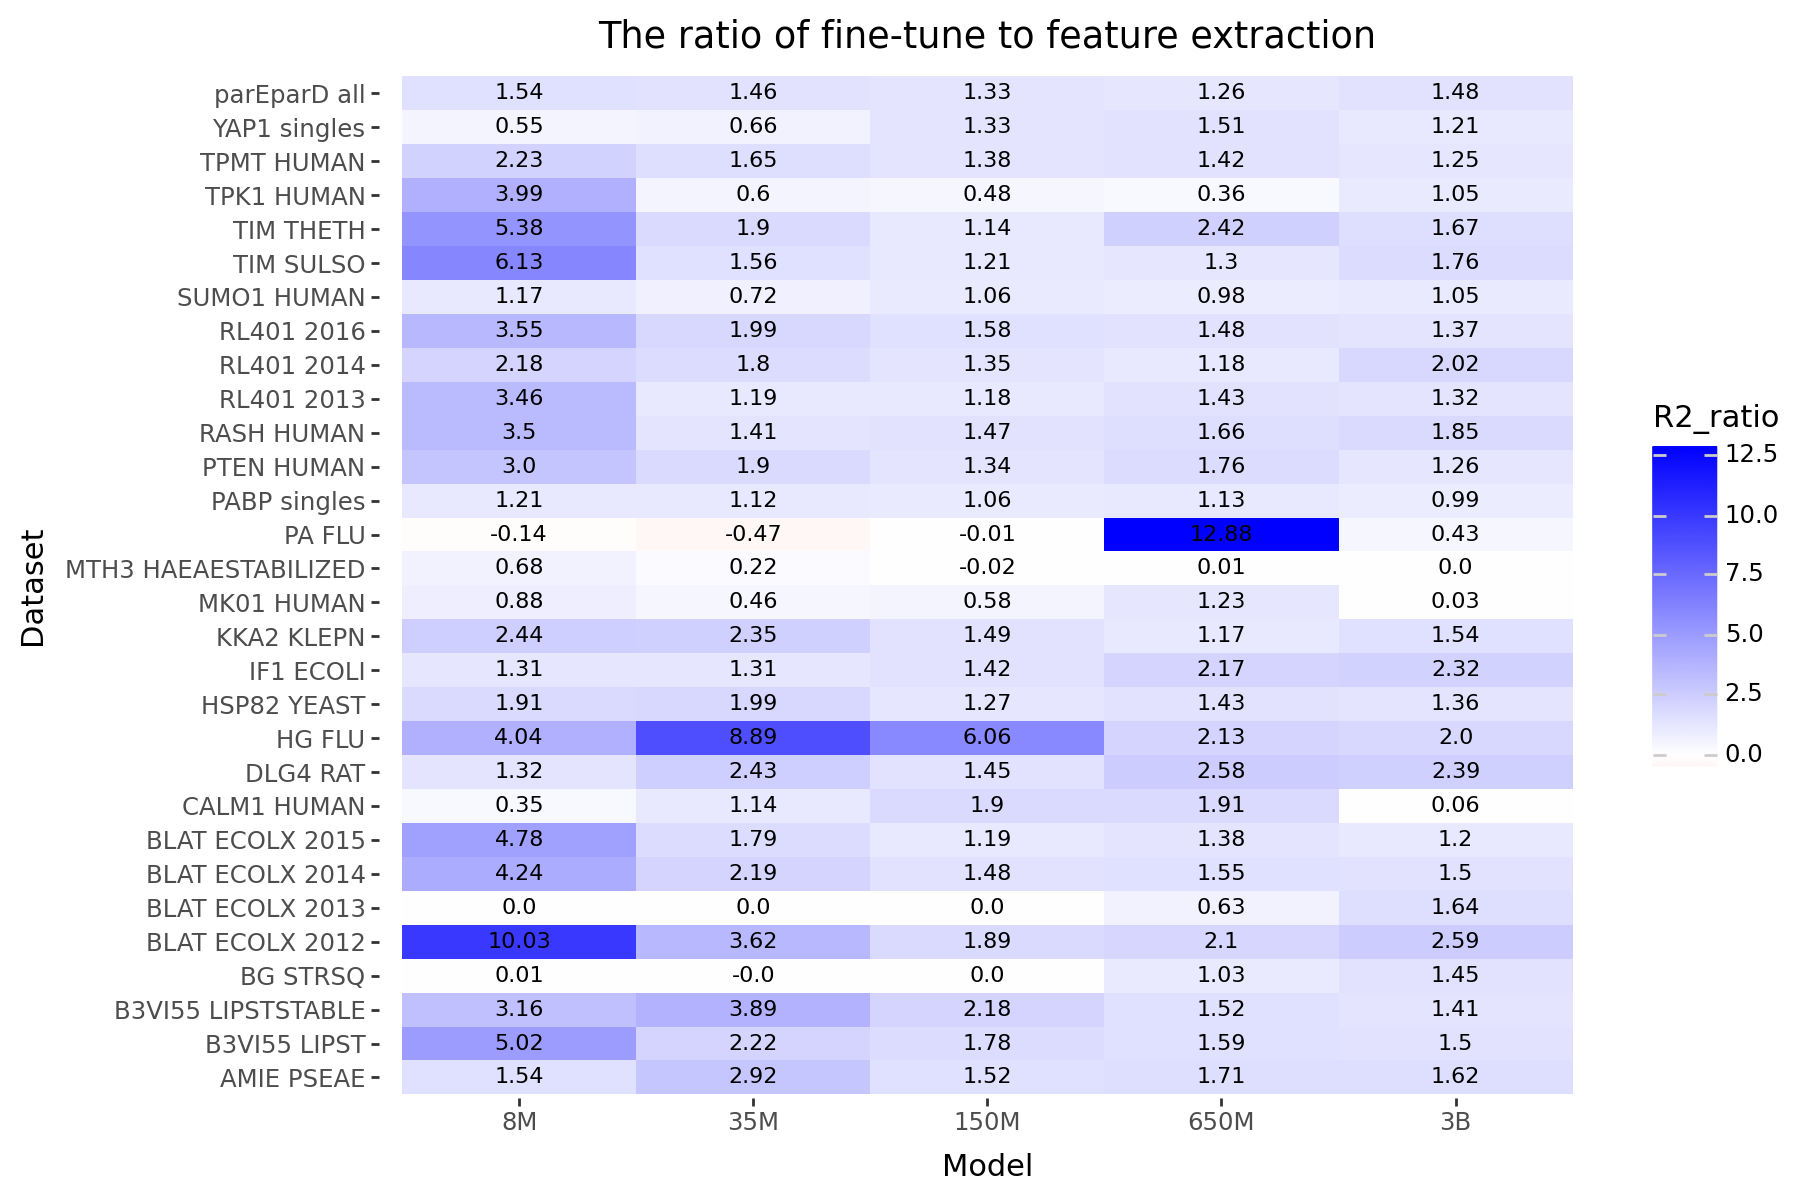

In [24]:
# Tim THEMA is way larger, hard to visialize
res2 = res.query('Dataset_Name != "TIM THEMA"')
# this ratio tell me, how much better is the fine-tune compared to the feature extraction
plot = (
    pln.ggplot(res2, pln.aes(x='ModelSize', y='Dataset_Name', fill='R2_ratio'))
    + pln.geom_tile()
    + pln.geom_text(pln.aes(label='R2_ratio'), color='black', size=8)
    + pln.ggtitle('The ratio of fine-tune to feature extraction')
    + pln.xlab('Model')
    + pln.ylab('Dataset')
    + pln.scale_fill_gradient2(low='red', mid='white', high='blue', midpoint=0)
    + pln.theme(figure_size=(9, 6), panel_background=pln.element_blank())
)

plot